# Условие

Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности.

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой.

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров

# Библиотеки

In [132]:
import pandas as pd
from scipy import stats
import numpy as np
import pingouin

# Анализ

## Подгрузка и анализ данных

In [234]:
ann = pd.read_csv('experiment_lesson_4.csv', index_col =0  )

In [46]:
ann.isna().sum()

delivery_time       0
district            0
experiment_group    0
dtype: int64

In [64]:
(ann == '' ) .sum()

delivery_time       0
district            0
experiment_group    0
dtype: int64

In [66]:
(ann == ' ' ) .sum()

delivery_time       0
district            0
experiment_group    0
dtype: int64

In [52]:
ann.experiment_group.unique()

array(['control', 'test'], dtype=object)

In [50]:
ann.district.unique()

array(['Purlieus', 'Central', 'Suburb'], dtype=object)

In [16]:
ann.head(5)

,delivery_time,district,experiment_group
order_id,,,
3159,44.0,Purlieus,control
10426,51.0,Purlieus,control
9155,46.0,Purlieus,control
10699,34.0,Purlieus,control
10061,43.0,Purlieus,control


In [18]:
ann.experiment_group.unique()

array(['control', 'test'], dtype=object)

In [36]:
ann.experiment_group.value_counts()

experiment_group
test       10104
control    10092
Name: count, dtype: int64

##  Шаги из гугл формы

<Axes: >

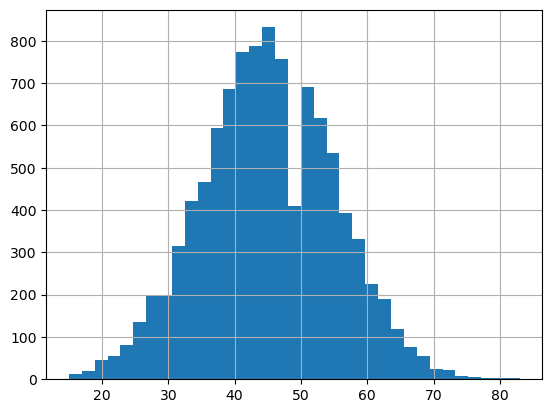

In [26]:
ann[ann.experiment_group == 'control']['delivery_time'].hist(bins = 35)

<Axes: >

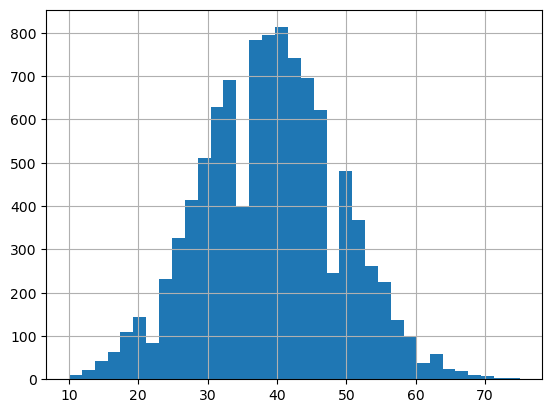

In [34]:
ann[ann.experiment_group == 'test']['delivery_time'].hist(bins = 35)

<Axes: >

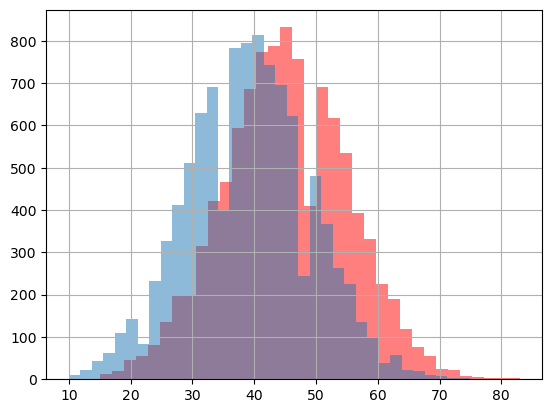

In [32]:
ann[ann.experiment_group == 'control']['delivery_time'].hist(bins = 35, color = 'red', alpha = 0.5)

ann[ann.experiment_group == 'test']['delivery_time'].hist(bins = 35, alpha = 0.5)

In [249]:
diff = len(ann[ann.experiment_group == 'test']) - len(ann[ann.experiment_group == 'control'])

print(f'Разница между контрольной и тестовой группами: {diff}' )

Разница между контрольной и тестовой группами: 12


In [251]:
test_d_time = ann[ann.experiment_group == 'test']['delivery_time']
control_d_time = ann[ann.experiment_group == 'control']['delivery_time']

In [253]:
scipy.stats.normaltest(test_d_time, nan_policy= 'omit') 

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [255]:
scipy.stats.normaltest(control_d_time, nan_policy= 'omit') 

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [257]:
pingouin.normality(control_d_time, method = 'jarque_bera')

,W,pval,normal
delivery_time,0.281759,0.868594,True


In [259]:
pingouin.normality(test_d_time, method = 'jarque_bera')

,W,pval,normal
delivery_time,6.929487,0.031281,False


In [218]:
print(f"Std тестовая группа: {np.std(test_d_time):.2f}") 
print(f"Среднее тестовая группа: {np.mean(test_d_time):.2f}") 

Std тестовая группа: 9.88
Среднее тестовая группа: 39.05


In [220]:
print(f"Std контрольная группа: {np.std(control_d_time):.2f}") 
print(f"Среднее контрольная группа: {np.mean(control_d_time):.2f}") 

Std контрольная группа: 9.99
Среднее контрольная группа: 45.07


In [224]:
percentage_change = ((np.mean(test_d_time)- np.mean(control_d_time)) / np.mean(control_d_time)) * 100
print(f"Процентное изменение среднего: {percentage_change:.2f}%")

Процентное изменение среднего: -13.35%


In [286]:
(np.mean(test_d_time)- np.mean(control_d_time))

-6.018287926844998

In [304]:
res = stats.ttest_ind(test_d_time, control_d_time)

In [336]:
res

TtestResult(statistic=-43.03582663183714, pvalue=0.0, df=20194.0)

In [264]:
res = stats.ttest_ind(test_d_time, control_d_time, nan_policy='propagate', alternative='less', equal_var=False,)

Научный вывод: На основании проведенного A/B-теста с использованием t-критерия для независимых выборок при уровне значимости 0.05 гипотеза о равенстве среднего времени доставки между контрольной и тестовой выборками отвергается.  T statistic=-43, pvalue=0.0. (меньше, чем 10^−16 )    В среднем скорость доставки улучшилась на 13.35% или на 6 минут

Вывод без стат терминов: В ходе проведения AB теста были выявлены статистически значимые улучшения скорости доставки в тестовой группе по сравнению с контрольной. В среднем скорость доставки улучшилась на 13.35%  или на 6 минут, что означает, что опцию "по пути" с точки зрения скорости доставки можно рассматривать, как успешную и она рекомендуется для добавления в продукт 